In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv("Churn_Modelling.csv")


In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [79]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [80]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [81]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [82]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


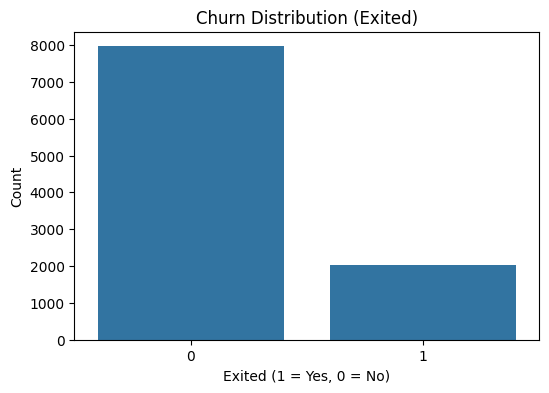

In [84]:
# 1. Churn Distribution (target variable)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Exited')
plt.title("Churn Distribution (Exited)")
plt.xlabel("Exited (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

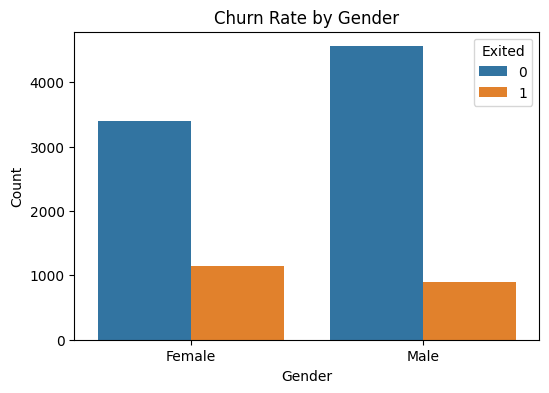

In [86]:
# 2. Churn vs Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

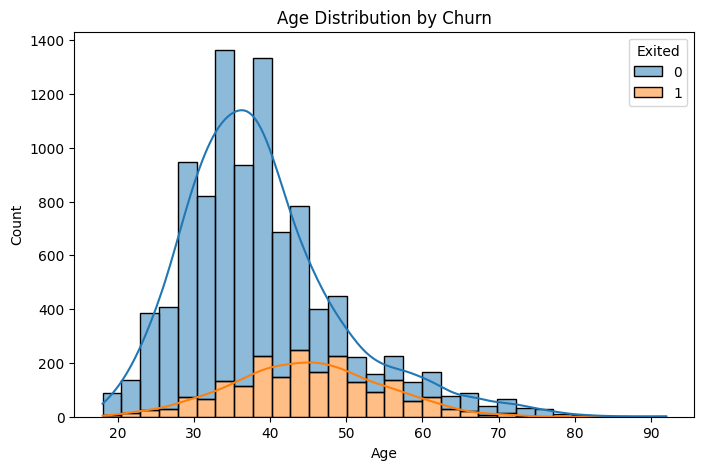

In [88]:
# 3. Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', bins=30, kde=True, hue='Exited', multiple='stack')
plt.title("Age Distribution by Churn")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7975 - loss: 0.5638 - val_accuracy: 0.7975 - val_loss: 0.5028
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.5006 - val_accuracy: 0.7975 - val_loss: 0.4910
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7969 - loss: 0.4878 - val_accuracy: 0.7975 - val_loss: 0.4787
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7992 - loss: 0.4724 - val_accuracy: 0.7975 - val_loss: 0.4652
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7895 - loss: 0.4706 - val_accuracy: 0.7975 - val_loss: 0.4531
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8021 - loss: 0.4397 - val_accuracy: 0.7981 - val_loss: 0.4435
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7933 - loss: 0.4455 - val_accuracy: 0.8050 - val_loss: 0.4375
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8014 - loss: 0.4345 - val_accu

In [ ]:
model.layers[1].get_weights()

[array([[ 2.4579127 , -1.8996364 , -1.6152884 ,  2.0956564 ,  1.9762251 ,
          2.1529572 , -2.263195  ,  1.6992198 ,  1.7090267 ,  1.8292801 ,
         -1.1655872 ],
        [ 0.05602972, -0.55494875, -0.8957458 ,  0.28056064,  0.5604719 ,
          0.68742883, -0.58961207,  0.62751895,  0.60053796,  0.43601686,
         -0.9999215 ],
        [ 0.41980788, -0.9781209 , -0.7787052 ,  0.24376254,  0.5214442 ,
          0.98986703, -0.29224542,  0.43256485,  0.41392738,  1.2158209 ,
         -0.27678156],
        [ 0.35607797, -0.31263238, -0.8650455 ,  0.4441236 ,  0.64505726,
          0.744824  , -0.44615212,  0.530466  ,  0.34873417, -0.46239296,
         -0.6952793 ],
        [-0.00932332, -0.32272097, -0.46169025,  0.92801285,  0.19845787,
          0.06402636,  0.26588574,  0.90929615,  0.7570097 ,  0.9355091 ,
         -0.8276445 ],
        [-0.912762  ,  0.9399463 ,  1.1648251 , -1.1606289 , -0.47729713,
         -1.236377  ,  0.6014045 , -0.87382597, -0.79678017, -0.3822415

In [ ]:
y_log=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.05733039],
       [0.11199842],
       [0.09271012],
       ...,
       [0.02160248],
       [0.02906293],
       [0.30755213]], dtype=float32)

In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

In [ ]:
history

In [ ]:
history.history

{'accuracy': [0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7995312213897705,
  0.8090624809265137,
  0.8123437762260437,
  0.8145312666893005,
  0.815625011920929,
  0.8157812356948853,
  0.8206250071525574,
  0.819531261920929,
  0.8203125,
  0.8229687213897705,
  0.8235937356948853,
  0.8262500166893005,
  0.8259375095367432,
  0.8303124904632568,
  0.8318750262260437,
  0.8339062333106995,
  0.8371875286102295,
  0.8378124833106995,
  0.8396875262260437,
  0.8403124809265137,
  0.8414062261581421,
  0.8412500023841858,
  0.8423437476158142,
  0.84375,
  0.8453124761581421,
  0.844531238079071,
  0.8450000286102295,
  0.8460937738418579,
  0.8475000262260437,
  0.8489062786102295,
  0.8485937714576721,
  0.8490625023841858,
  0.8503124713897705,
  0.8501562476158142,
  0.8512499928474426,
  0.8515625,
  0.8510937690734863,
  0.8515625,
  0.8539062738418579,
  0.8537499904632568,
  0.8534374833106

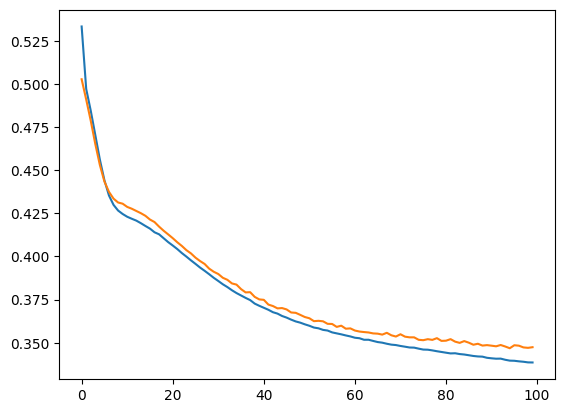

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
